# Matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

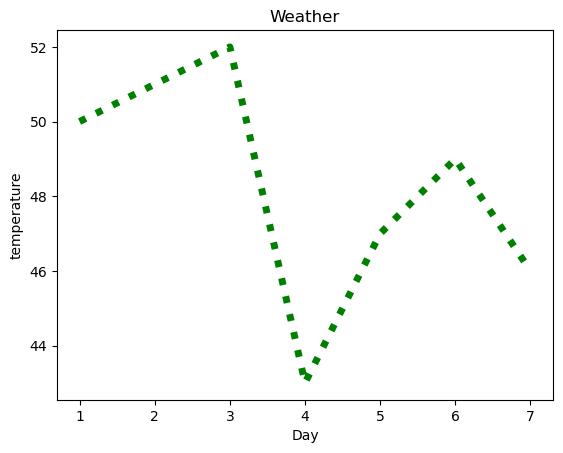

In [3]:
x =[1,2,3,4,5,6,7]
y=[50,51,52,43,47,49,46]
plt.xlabel('Day')
plt.ylabel('temperature')
plt.title('Weather')
plt.plot(x,y,color='green',linewidth=5,linestyle='dotted')

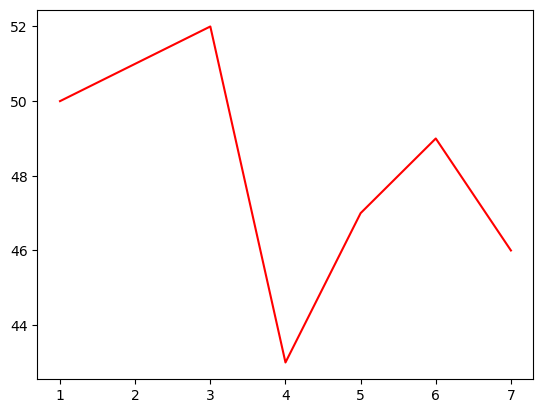

In [4]:
plt.plot(x,y,color='red')

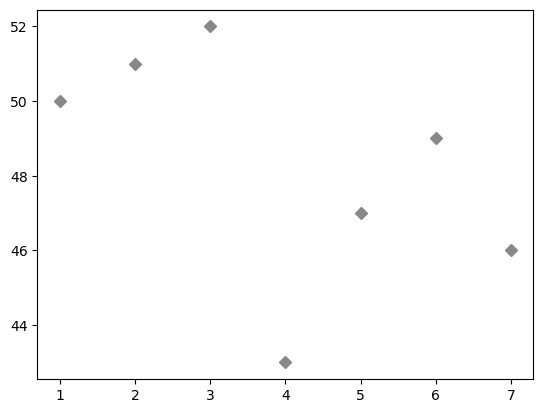

In [5]:
plt.plot(x,y,color='#888888',marker='D',linestyle='')#the color can also be given in a hexadecimal

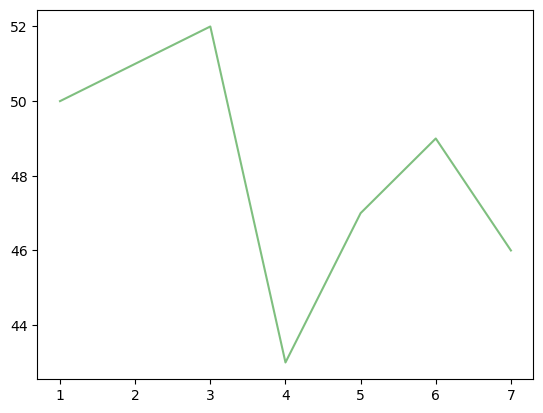

In [7]:
#alpha in pyplot -> Transperancy of the plot
plt.plot(x,y,color='green',alpha=0.5)#alpha values can be the range within 0 and 1

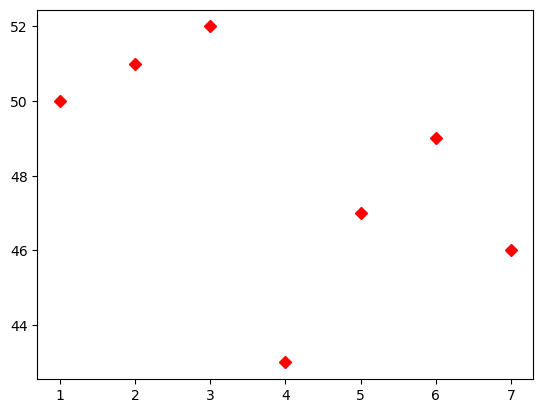

In [8]:
#instead of doing all these we can use 
plt.plot(x,y,'rD')# r-> red and D-> Diamond

In [5]:
#Working With dataSet -> Historical Prices
import pandas as pd
data = pd.read_csv('HistoricalPrices.csv')


In [6]:
data.head()

,Date,Open,High,Low,Close
0,12/01/23,35914.45,36264.85,35914.45,36245.50
1,11/30/23,35596.57,35970.70,35592.22,35950.89
2,11/29/23,35436.80,35579.13,35405.89,35430.42
3,11/28/23,35332.13,35518.67,35307.73,35416.98
4,11/27/23,35376.44,35410.37,35280.57,35333.47


In [7]:
#downloaded has an extra space in the column names
data =data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})

In [8]:
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [9]:
#here the date is an object.We need to change it as a datetime 
data['Date']=pd.to_datetime(data['Date'])

In [10]:
data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [11]:
data =data.sort_values(by ='Date')# Sort the values by date

In [12]:
data.head()

,Date,Open,High,Low,Close
62,2023-09-05,34843.22,34871.26,34635.63,34641.97
61,2023-09-06,34611.68,34611.68,34291.56,34443.19
60,2023-09-07,34351.18,34560.86,34351.18,34500.73
59,2023-09-08,34487.41,34627.85,34473.57,34576.59
58,2023-09-11,34650.01,34784.52,34578.59,34663.72


In [13]:
#Loading Matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

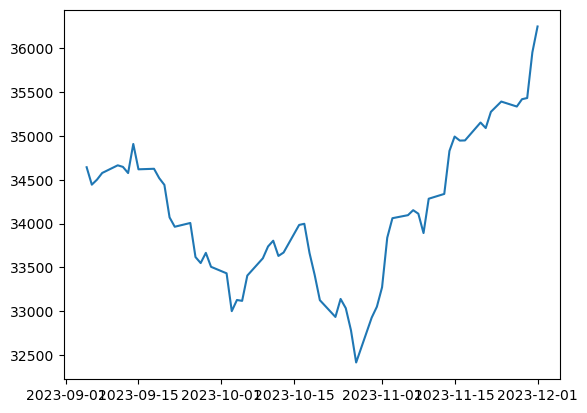

In [14]:
#line plot with single line
plt.plot(data['Date'],data['Close'])
plt.show()

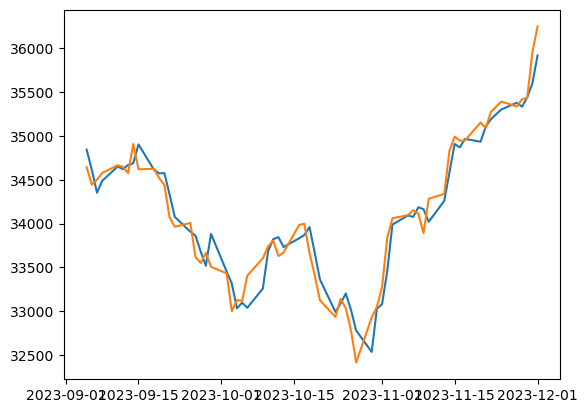

In [15]:
#line plot with multiple line
plt.plot(data['Date'],data['Open'])
plt.plot(data['Date'],data['Close'])
plt.show()



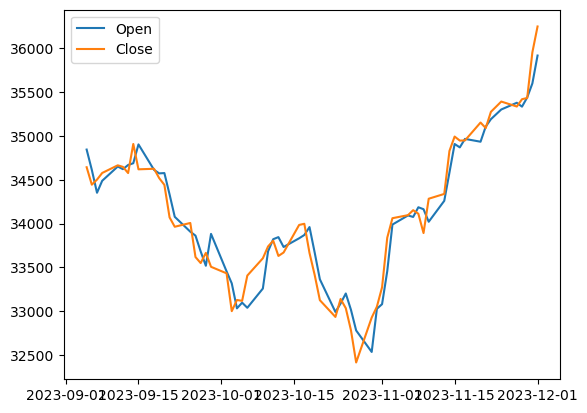

In [16]:
plt.plot(data['Date'],data['Open'],label='Open')
plt.plot(data['Date'],data['Close'],label='Close')
plt.legend()
plt.show()



In [17]:
from calendar import month_name
#create a new column month and from the date we extract the Month in the categorical variable
#and orders them by chronological order  using the month_name list
data['Month']=pd.Categorical(data['Date'].dt.month_name(),month_name[1:]) 
Monthly_mean =data\
    .groupby('Month')\
    .mean()\
    .reset_index()
Monthly_mean.head(6)
#Why the values didn't display...i don't know :(  but in the next cell Output Displayed :)

C:\Users\nivet\AppData\Local\Temp\ipykernel_18712\1631486151.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()\


,Month,Open,High,Low,Close
0,January,NaN,NaN,NaN,NaN
1,February,NaN,NaN,NaN,NaN
2,March,NaN,NaN,NaN,NaN
3,April,NaN,NaN,NaN,NaN
4,May,NaN,NaN,NaN,NaN
5,June,NaN,NaN,NaN,NaN


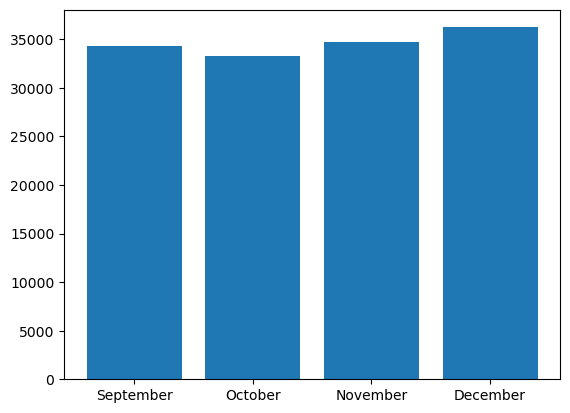

In [18]:
#bar graph 
#vertical bar plots
plt.bar(Monthly_mean['Month'],height = Monthly_mean['Close'])
plt.show()

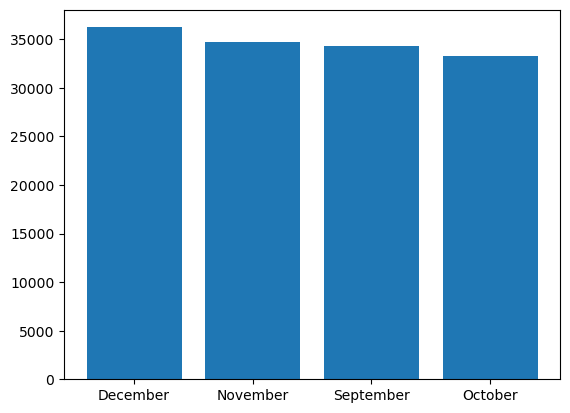

In [19]:
#sorted plot or reodering
mean_srtd = Monthly_mean.sort_values(by='Close',ascending = False)
plt.bar(mean_srtd['Month'],height =mean_srtd['Close'])
plt.show()

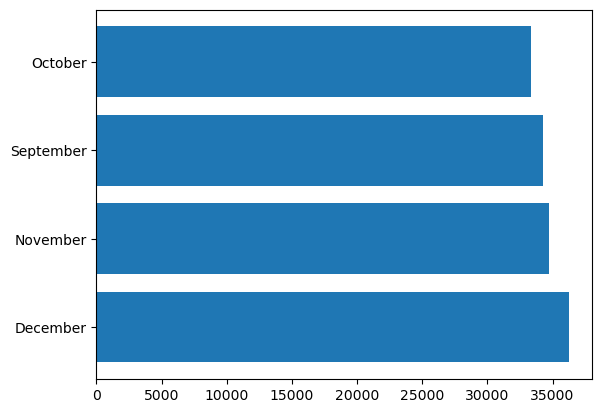

In [20]:
#horizondal bar graph

plt.barh(mean_srtd['Month'], width=mean_srtd['Close'])
plt.show()


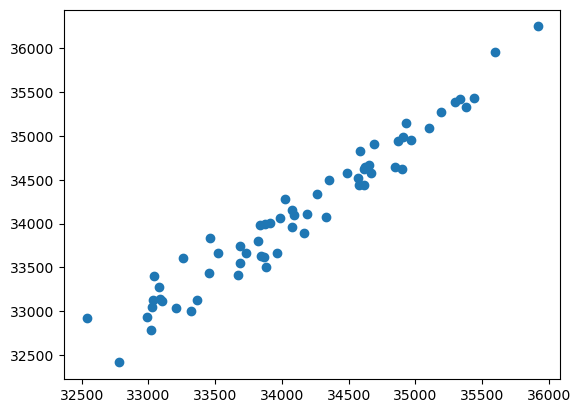

In [21]:
#Scatter plot
plt.scatter(data['Open'],data['Close'])
plt.show()

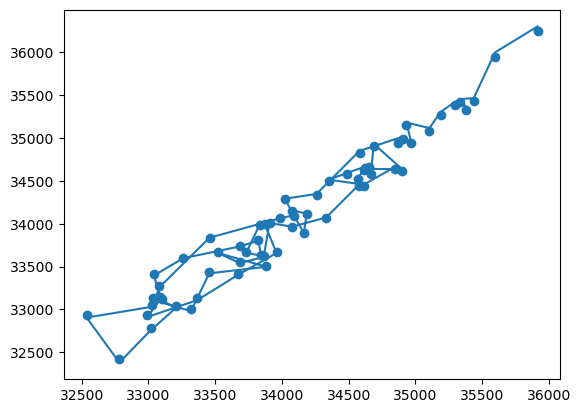

In [22]:
#scatter plot with a trend line
import numpy as np
z=np.polyfit(data['Open'],data['Close'],1)#straight line ->first degree polynomial
p=np.poly1d(z)#polynomial function based on coeff in z
plt.scatter(data['Open'],data['Close'])
plt.plot(data['Open'],p(data['Close']))
plt.show()


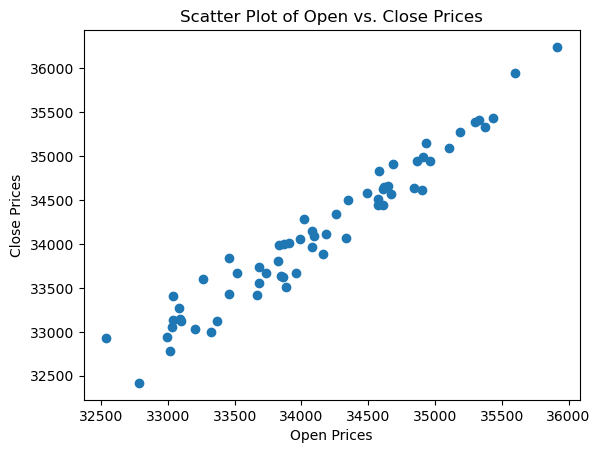

In [23]:
#Setting plot title and axis labels
import matplotlib.pyplot as plt

plt.scatter(data['Open'],data['Close'])
plt.title('Scatter Plot of Open vs. Close Prices')
plt.xlabel('Open Prices')
plt.ylabel('Close Prices')
plt.show()


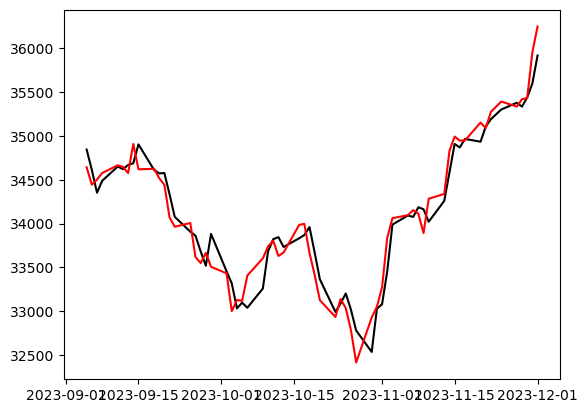

In [25]:
 #Chsnging colors
plt.plot(data['Date'],data['Open'],color='Black')
plt.plot(data['Date'],data['Close'],color='red')
plt.show()
    
    

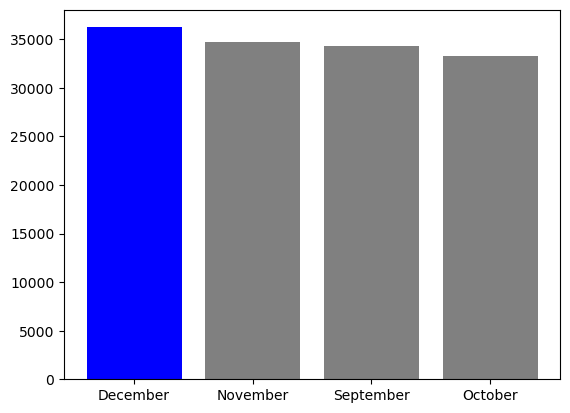

In [27]:
#Chaning  colors for bar
plt.bar(mean_srtd['Month'],height=mean_srtd['Close'],color=['blue','gray','gray','gray','gray','gray'])
plt.show()

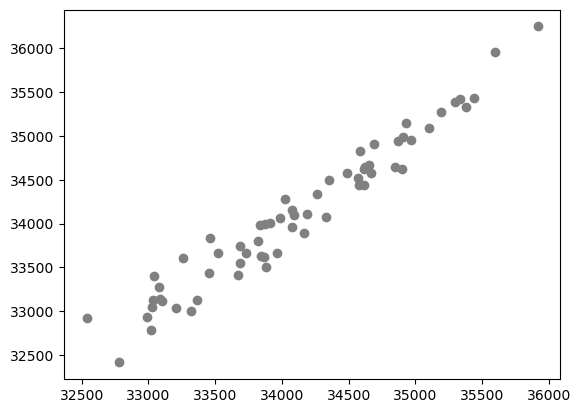

In [32]:
#for Scatter plots
plt.scatter(data[data['Month']=='January']['Open'],data[data['Month'] == 'January']['Close'], color = 'blue')
plt.scatter(data[data['Month']!='January']['Open'],data[data['Month'] != 'January']['Close'], color = 'gray')
plt.show()

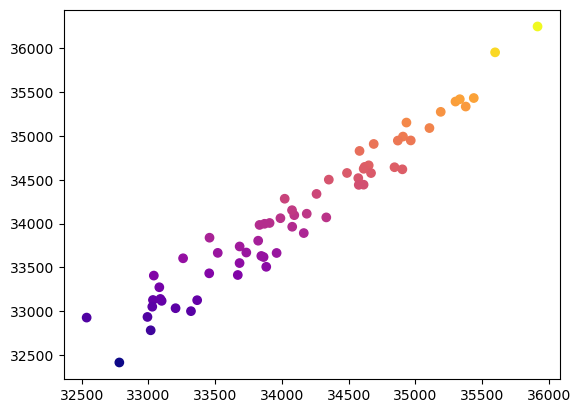

In [33]:
#using color maps
plt.scatter(data['Open'],data['Close'],c=data['Close'],cmap = plt.cm.plasma)#colormap
plt.show()
# here creates the color varients from low to high
#low - Blue
#high - red

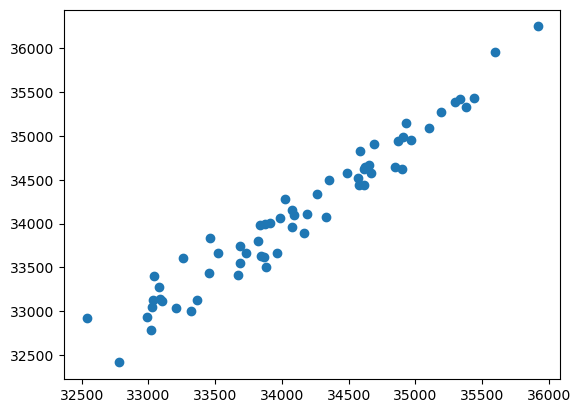

In [34]:
#Saving plots
plt.scatter(data['Open'],data['Close'])
plt.savefig('DJIA 2022 Scatterplot Open vs.Close.png')